

<h1>Loop Currents</h1>
<p><span style="font-size:medium;">By Cici Sun, Yiming Zhu, Oscar Jaroker</span></p>



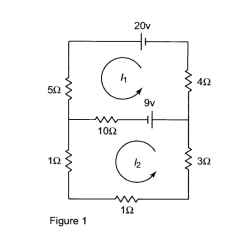

$
19I_1-10I_2=29 \; \; \; \; \; \; \;\text{(1)}
$

$
-10I+15I_2=-9 \; \; \; \; \; \; \;\text{(2)}
$

### 1. Confirm equations (1) and (2) above.
Kirchoff's Voltage Law states that the sum of the voltage drops in one direction around a loop current equals the sum of the voltage sources in the same direction around the loop.\
In the first loop, the sum of resistance values that the current $I_1$ goes through is $19\Omega$. The resistance the current $I_2$ goes through is $10\Omega$ and is in the opposite direction, so its sign is negative.\
In the second loop, the sum of resistance values that the current $I_2$ goes through is $15\Omega$ and current $I_1$ goes through the $10\Omega$ resistor in the opposite direction.

### 2. Solve the system of equations to find the loop currents $I_1$ and $I_2$
First, we define the coefficient matrix $A$ and the vector $\overrightarrow{b}$, then use MATLAB's '\\' operator to solve for $I_1$ and $I_2$.


In [14]:
A = [19, -20 ; -10, 15];
b = [29 ; -9];
currents = A\b

currents = 2x1 double
    3.0000
    1.4000

We find that $I_1=3$ and $I_1=1.4$

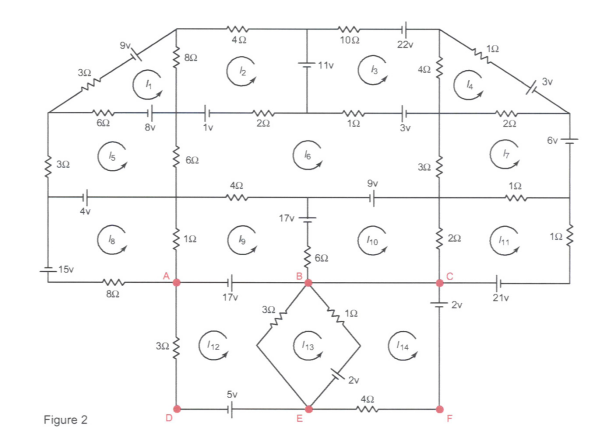

#### System of Equations to find Loop Currents in Figure 2:
\begin{align*}
17I_1 - 8I_2 - 6I_5 &= -1 \\
-8I_1 + 14I_2 - 2I_6  &= 10 \\
15I_3 - 4I_4 - I_6  &= -36 \\
- 4I_3 + 7I_4  - 2I_7 &= 3 \\
-6I_1 + 15I_5 - 6I_6 &= -4 \\
-2I_2 -I_3-6I_5+16I_6-3I_7-4I_9  &= 13 \\
-2I_4-3I_6+6I_7-I_{11} &= 6 \\
9I_8-I_9 &= 11 \\
-4I_6-I_8+11I_9-6I_{10} &= 34 \\
-6I_9+8I_{10}-2I_{11} &= -26 \\
-I_7-2I_{10}+4I_{11} &= -21 \\
6I_{12} -3I_{13}   &= -12 \\
-3I_{12}+4I_{13}-I_{14} &= 2 \\
- I_{13} + 5I_{14}  &= 0
\end{align*}
The augmented matrix of this system is equivalent to $A$, given below.

### 3. Find the loop currents for this network. Current between A and B? Between B and E?
First, we will solve for the vector $\overrightarrow{I}$ that contains all the loop currents $I_1$ through $I_14$. \
We have the augmented matrix $[A\;b]$, and will reduce down the reduced-row echelon form using MATLAB's $\verb|rref|$ function.\
The last column of the reduced matrix will be the loop currents, as we know $\verb|rref(A)|$ is the identity matrix.

In [18]:
A = [17, -8, 0, 0, -6, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1;
 -8, 14, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0, 10;
 0, 0, 15, -4, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, -36;
 0, 0, -4, 7, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 3;
 -6, 0, 0, 0, 15, -6, 0, 0, 0, 0, 0, 0, 0, 0, -4;
 0, -2, -1, 0, -6, 16, -3, 0, -4, 0, 0, 0, 0, 0, 13;
 0, 0, 0, -2, 0, -3, 6, 0, 0, 0, -1, 0, 0, 0, 6;
 0, 0, 0, 0, 0, 0, 0, 9, -1, 0, 0, 0, 0, 0, 11;
 0, 0, 0, 0, 0, -4, 0, -1, 11, -6, 0, 0, 0, 0, 34;
 0, 0, 0, 0, 0, 0, 0, 0, -6, 8, -2, 0, 0, 0, -26;
 0, 0, 0, 0, 0, 0, -1, 0, 0, -2, 4, 0, 0, 0, -21;
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, -3, 0, -12;
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, 4, -1, 2;
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 5, 0];
R = rref(A);
Currents = R(:,15)'


Currents = 1x14 double
    0.8941    1.4612   -2.5342   -0.9164    0.7517    1.6519    0.3611    1.4291    1.8619   -3.5926   -6.9560   -2.8696   -1.7391   -0.3478

To find the current in the branch between A and B, we refer to Figure 2 and add the loop currents going through it, negating the sign of the current for flow that goes in the opposite direction.

In [15]:
AtoB = Currents(9)-Currents(12)

AtoB = 4.7315

The current in the branch between A and B is 4.7315 amps in the direction of $I_9$. Now we repeat this process for the branch between B and E.

In [16]:
BtoE = Currents(13) - Currents(12)

BtoE = 1.1304

The current in the brach between B and E is 1.13 amps in the direction of $I_{13}$.

### 4. Find the loop currents when every power source is replaced by a 9V battery
First, we must change the last column of the augmented matrix to reflect every power source contributing 9 volts.\
The new matrix $A$ is:

In [ ]:
newA = [17, -8, 0, 0, -6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0;
 -8, 14, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0;
 0, 0, 15, -4, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, -27;
 0, 0, -4, 7, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 9;
 -6, 0, 0, 0, 15, -6, 0, 0, 0, 0, 0, 0, 0, 0, 0;
 0, -2, -1, 0, -6, 16, -3, 0, -4, 0, 0, 0, 0, 0, 27;
 0, 0, 0, -2, 0, -3, 6, 0, 0, 0, -1, 0, 0, 0, 9;
 0, 0, 0, 0, 0, 0, 0, 9, -1, 0, 0, 0, 0, 0, 0;
 0, 0, 0, 0, 0, -4, 0, -1, 11, -6, 0, 0, 0, 0, 18;
 0, 0, 0, 0, 0, 0, 0, 0, -6, 8, -2, 0, 0, 0, 18;
 0, 0, 0, 0, 0, 0, -1, 0, 0, -2, 4, 0, 0, 0, -9;
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, -3, 0, 0;
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3, 4, -1, 9;
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 5, 0];
newR = rref(A)
newCurrents = newR(:,15)'